# Capstone Project - Battle of Neighborhood - Identifying a good location to start Toy Store

**Import required libraries**

In [18]:
import requests
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium
import pandas as pd
import numpy as np
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
!pip install geopy
from geopy.geocoders import Nominatim

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.1.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-3.0           |   py36h45558ae

**Scrape the input URL**

In [19]:
input_html ='https://frenchmoments.eu/arrondissements-of-paris'
html_data = requests.get(input_html).content

parsed_data = BeautifulSoup(html_data,'html.parser')

In [20]:
borough_list = []
for idx in parsed_data.select('h4'):
    if idx.text.find('arrondissement') > -1:
       start_pos = idx.text.find('arrondissement') + len('arrondissement') + 2
       end_pos = idx.text.find('arrondissement')  + len('arrondissement')
       borough_list.append((idx.text[0:end_pos]))
    
neighborhood_list = []
parsed_data = BeautifulSoup(html_data,'html.parser')
for idx in parsed_data.select('h4'):
    if idx.text.find('arrondissement') > -1:
       start_pos = idx.text.find('arrondissement') + len('arrondissement') + 2
       end_pos = len(idx.text)-1
       neighborhood_list.append(idx.text[start_pos:end_pos])

print("Borough list - ", borough_list)
print("Neighborhood list - ", neighborhood_list)

Borough list -  ['1st arrondissement', '2nd arrondissement', '3rd arrondissement', '4th arrondissement', '5th arrondissement', '6th arrondissement', '7th arrondissement', '8th arrondissement', '9th arrondissement', '10th arrondissement', '11th arrondissement', '12th arrondissement', '13th arrondissement', '14th arrondissement', '15th arrondissement', '16th arrondissement', '17th arrondissement', '18th arrondissement', '19th arrondissement', '20th arrondissement']
Neighborhood list -  ['Louvre', 'Bourse', 'Marais – north', 'Marais – south, Notre-Dame', 'Latin Quarter', 'St. Germain-des-Prés, Luxembourg Garden', 'Eiffel Tower, Invalides', 'Arc de Triomphe, Champs-Élysées', 'Opéra Garnier, Grands Boulevards', 'Canal Saint-Martin', 'Faubourg St. Antoine – Oberkampf', 'Bercy, Bois de Vincennes', 'Tolbiac, Gobelins, Paris Rive Gauche', 'Montparnasse', 'Vaugirard, Grenelle', 'Passy, Auteuil', 'Batignolles, Monceau', 'Montmartre', 'La Villette, Buttes-Chaumont', 'Belleville, Ménilmontant']


In [37]:
postal_code = []
for idx in parsed_data.select('span'):
    if (idx.text.find('Postal Code') > -1):
       postal_code.append(idx.text[-5:])

lat_list = []
long_list = []
x_nom = Nominatim(user_agent='Foursquare')
for idx, idy in zip(borough_list, postal_code):
    x_nom_out = x_nom.geocode('{},{}'.format(idx,idy)).raw
    lat_list.append(x_nom_out['lat'])
    long_list.append(x_nom_out['lon'])
    
print('lat_list -', lat_list)
print('long_list-', long_list)
print('postal-', postal_code)

lat_list - ['48.8646144', '48.868743', '48.864212', '48.8562021', '48.8460591', '48.8504333', '48.8570281', '48.87225991745448', '48.876019', '48.876106', '48.858416', '48.8396154', '48.8323973', '48.8330589', '48.8413705', '48.8631709', '48.8842239', '48.8900117', '48.889343', '48.865042']
long_list- ['2.334396', '2.341688', '2.360936', '2.3556193', '2.3445228', '2.3329507', '2.3201953', '2.311689291751072', '2.339962', '2.35991', '2.379703', '2.3957517', '2.3555829', '2.3269591', '2.3003827', '2.2757648', '2.3223639', '2.3464668', '2.38436', '2.398929']
postal- ['75001', '75002', '75003', '75004', '75005', '75006', '75007', '75008', '75009', '75010', '75011', '75012', '75013', '75014', '75015', '75016', '75017', '75018', '75019', '75020']


**Required Details are moved into DataFrame**

In [40]:
df_paris = pd.DataFrame(columns=['Borough', 'Neighborhood', 'Postal Code', 'Latitude','Longitude'])
df_paris['Borough'] = borough_list
df_paris['Neighborhood'] = neighborhood_list
df_paris['Postal Code'] = postal_code
df_paris['Latitude'] = lat_list
df_paris['Longitude'] = long_list
df_paris

,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,1st arrondissement,Louvre,75001,48.8646144,2.334396
1,2nd arrondissement,Bourse,75002,48.868743,2.341688
2,3rd arrondissement,Marais – north,75003,48.864212,2.360936
3,4th arrondissement,"Marais – south, Notre-Dame",75004,48.8562021,2.3556193
4,5th arrondissement,Latin Quarter,75005,48.8460591,2.3445228
5,6th arrondissement,"St. Germain-des-Prés, Luxembourg Garden",75006,48.8504333,2.3329507
6,7th arrondissement,"Eiffel Tower, Invalides",75007,48.8570281,2.3201953
7,8th arrondissement,"Arc de Triomphe, Champs-Élysées",75008,48.87225991745448,2.311689291751072
8,9th arrondissement,"Opéra Garnier, Grands Boulevards",75009,48.876019,2.339962
9,10th arrondissement,Canal Saint-Martin,75010,48.876106,2.35991


In [22]:
print("Total number of arrondissement in Paris: ", df_paris.shape[0])

Total number of arrondissement in Paris:  20


In [41]:
df_paris['Latitude'] = df_paris['Latitude'].astype('float')
df_paris['Longitude'] = df_paris['Longitude'].astype('float')

**Map of Paris Generated using FOLIUM**

In [46]:
paris_map_1 = folium.Map([paris_lat,paris_long],zoom_start =13)

for lat, long, borough,neigh in zip(df_paris['Latitude'],df_paris['Longitude'],df_paris['Borough'],df_paris['Neighborhood']):
    label = '{},{}'.format(borough,neigh)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat,long],
        popup=label).add_to(paris_map_1)
paris_map_1

**Declare Credentials to access FOURSQUARE API**

In [47]:
x_nom = Nominatim(user_agent='Foursquare')
x_nom_out = x_nom.geocode('Paris,france')
paris_lat = x_nom_out.latitude
paris_long = x_nom_out.longitude

In [48]:
CLIENT_ID = '0WAUW3LYUG1C2AHQKJBAMTWCLGZPXDRTRBCZ3EZI4EEZKZHL'
CLIENT_SECRET = 'TRBZA1ORTZTYWOBOPIDNEB0HGNT24RGEKYF3IGK2VV2VBM31'
VERSION = '20200601'
RADIUS = 1500

**Using FOURSQUARE explore all the toy stores in all arrondissements**

In [49]:
venue_list = []

for lat, long, borough, neigh in zip(df_paris['Latitude'],df_paris['Longitude'],df_paris['Borough'],df_paris['Neighborhood']):
    explore_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,RADIUS,'toys')
    explore_out = requests.get(explore_url).json()
    for idx in explore_out['response']['venues']:
        venue_name = idx['name']
        try:
           venue_type = idx['categories'][0]['name']
        except:
           venue_type = ''
        venue_lat = idx['location']['lat']
        venue_long = idx['location']['lng']
        venue_list.append([borough,neigh,lat,long,venue_name,venue_type,venue_lat,venue_long])

**Toys Store details DataFrame**

In [51]:
df_paris_toys_store = pd.DataFrame(venue for venue in venue_list)
df_paris_toys_store.columns = ['Borough','Neighbourhood','Borough Latitude','Borough Longitude','Store Name','Venue Type','Store Latitude','Store Longitude']
df_paris_toys_store = df_paris_toys_store[df_paris_toys_store['Venue Type'].str.contains('Toy')]
df_paris_toys_store.reset_index(inplace=True)
print("Total Number of Toys store :",df_paris_toys_store.shape[0])
df_paris_toys_store


Total Number of Toys store : 21


,index,Borough,Neighbourhood,Borough Latitude,Borough Longitude,Store Name,Venue Type,Store Latitude,Store Longitude
0,0,1st arrondissement,Louvre,48.864614,2.334396,"Toys""R""Us",Toy / Game Store,48.876202,2.324837
1,2,1st arrondissement,Louvre,48.864614,2.334396,Pulp's Toys,Toy / Game Store,48.851367,2.346638
2,4,2nd arrondissement,Bourse,48.868743,2.341688,"Toys""R""Us",Toy / Game Store,48.876202,2.324837
3,7,2nd arrondissement,Bourse,48.868743,2.341688,Pulp's Toys,Toy / Game Store,48.851367,2.346638
4,9,3rd arrondissement,Marais – north,48.864212,2.360936,"Toys""R""Us",Toy / Game Store,48.859749,2.369441
5,11,3rd arrondissement,Marais – north,48.864212,2.360936,Manga Toys,Toy / Game Store,48.854262,2.376240
6,12,3rd arrondissement,Marais – north,48.864212,2.360936,Pulp's Toys,Toy / Game Store,48.851367,2.346638
7,14,4th arrondissement,"Marais – south, Notre-Dame",48.856202,2.355619,"Toys""R""Us",Toy / Game Store,48.859749,2.369441
8,15,4th arrondissement,"Marais – south, Notre-Dame",48.856202,2.355619,Pulp's Toys,Toy / Game Store,48.851367,2.346638
9,18,4th arrondissement,"Marais – south, Notre-Dame",48.856202,2.355619,Manga Toys,Toy / Game Store,48.854262,2.376240


In [100]:
 print("Total number of TOYS Store:", df_paris_toys_store.shape[0])

Total number of TOYS Store: 21


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

**Add the count of toys stores in each arrondissement in DataFrame df_paris**

In [53]:
df_temp_toys_store = df_paris_toys_store[['Borough','Store Name']].groupby(['Borough'],as_index=False).count()
df_temp_toys_store.rename(columns={'Store Name':'Count'},inplace=True)
df_paris = df_paris.join(df_temp_toys_store.set_index('Borough'),on='Borough')
df_paris['Count'] = df_paris['Count'].fillna(0)

In [54]:
df_paris

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Count
0,1st arrondissement,Louvre,75001,48.864614,2.334396,2.0
1,2nd arrondissement,Bourse,75002,48.868743,2.341688,2.0
2,3rd arrondissement,Marais – north,75003,48.864212,2.360936,3.0
3,4th arrondissement,"Marais – south, Notre-Dame",75004,48.856202,2.355619,3.0
4,5th arrondissement,Latin Quarter,75005,48.846059,2.344523,1.0
5,6th arrondissement,"St. Germain-des-Prés, Luxembourg Garden",75006,48.850433,2.332951,1.0
6,7th arrondissement,"Eiffel Tower, Invalides",75007,48.857028,2.320195,0.0
7,8th arrondissement,"Arc de Triomphe, Champs-Élysées",75008,48.872260,2.311689,1.0
8,9th arrondissement,"Opéra Garnier, Grands Boulevards",75009,48.876019,2.339962,1.0
9,10th arrondissement,Canal Saint-Martin,75010,48.876106,2.359910,0.0


**A plot to show the count of toy stores in each arrondissements**

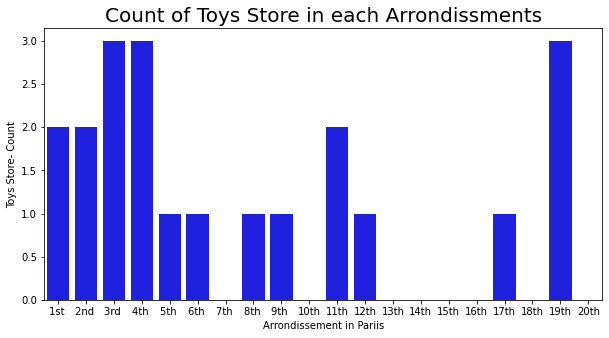

In [56]:
plt.figure(figsize=(10,5))
x_data = [idx[:4] for idx in df_paris['Borough'].values]
sns.barplot(x_data,df_paris['Count'],color='blue')
plt.xlabel("Arrondissement in Pariis")
plt.ylabel("Toys Store- Count")
plt.title("Count of Toys Store in each Arrondissments", fontsize=20)
plt.show()

**Explore all the venues in each location**

In [57]:
venue_list = []

for lat, long, borough, neigh in zip(df_paris['Latitude'],df_paris['Longitude'],df_paris['Borough'],df_paris['Neighborhood']):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,RADIUS)
    explore_out = requests.get(explore_url).json()
    for idx in explore_out['response']['groups'][0]['items']:
        venue_name = idx['venue']['name']
        try:
           venue_type = idx['venue']['categories'][0]['name']
        except:
           venue_type = ''
        venue_lat = idx['venue']['location']['lat']
        venue_long = idx['venue']['location']['lng']
        venue_list.append([borough,neigh,lat,long,venue_name,venue_type,venue_lat,venue_long])

In [61]:
df_paris_venue = pd.DataFrame(venue for venue in venue_list)
df_paris_venue.columns = ['Borough','Neighbourhood','Borough Latitude','Borough Longitude','Venue Name','Venue Type','Venue Latitude','Venue Longitude']
df_paris_venue['Venue Latitude']=df_paris_venue['Venue Latitude'].astype('float')
df_paris_venue['Venue Longitude']=df_paris_venue['Venue Longitude'].astype('float')
df_paris_venue

,Borough,Neighbourhood,Borough Latitude,Borough Longitude,Venue Name,Venue Type,Venue Latitude,Venue Longitude
0,1st arrondissement,Louvre,48.864614,2.334396,Sanukiya,Udon Restaurant,48.864713,2.333805
1,1st arrondissement,Louvre,48.864614,2.334396,Jardin du Palais Royal,Garden,48.864941,2.337728
2,1st arrondissement,Louvre,48.864614,2.334396,Palais Royal,Historic Site,48.863236,2.337127
3,1st arrondissement,Louvre,48.864614,2.334396,Musée des Arts Décoratifs,Art Museum,48.863077,2.333393
4,1st arrondissement,Louvre,48.864614,2.334396,On the Bab,Korean Restaurant,48.866417,2.335110
...,...,...,...,...,...,...,...,...
595,20th arrondissement,"Belleville, Ménilmontant",48.865042,2.398929,Curioos Paris,Tech Startup,48.857462,2.396344
596,20th arrondissement,"Belleville, Ménilmontant",48.865042,2.398929,Le Merle Moqueur,Bookstore,48.857386,2.398795
597,20th arrondissement,"Belleville, Ménilmontant",48.865042,2.398929,Bar Mama Shelter,Lounge,48.859820,2.402562
598,20th arrondissement,"Belleville, Ménilmontant",48.865042,2.398929,Square Edouard Vaillant,Park,48.865253,2.400370


In [63]:
paris_map_2= folium.Map([paris_lat,paris_long],zoom_start=12.5)
paris_map_2

In [64]:
for lat, long, venue in zip(df_paris_venue['Venue Latitude'], df_paris_venue['Venue Longitude'], df_paris_venue['Venue Name']):
    folium.CircleMarker(
    [lat,long],
    color = 'red',
    radius=5,
    fill = True,
    fill_color = 'Blue',
    fill_opacity=0.6,
    popup=folium.Popup(venue,parse_html=True)
    ).add_to(paris_map_2)
paris_map_2

In [165]:
df_temp = pd.get_dummies(df_paris_venue['Venue Type'])
df_temp.insert(0,'Borough',df_paris_venue['Borough'])
df_temp = df_temp.groupby(['Borough'],as_index=False).sum()
df_temp

,Borough,African Restaurant,Alsatian Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,...,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop
0,10th arrondissement,2,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,11th arrondissement,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0
2,12th arrondissement,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,13th arrondissement,0,0,0,0,0,0,0,2,0,...,2,0,0,0,0,0,1,0,0,0
4,14th arrondissement,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,1
5,15th arrondissement,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,16th arrondissement,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,17th arrondissement,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3,0
8,18th arrondissement,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
9,19th arrondissement,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Get the 10 most common venues in each arrondissements**

In [166]:
top_venues = 10
col_list = ['st','nd','rd']
columns_list = ['Borough']
for idx in range(top_venues):
    if idx < 3:
        columns_list.append('{}{} most common venue'.format((idx+1),col_list[idx]))
    else:
        columns_list.append('{}th most common venue'.format(idx+1))
                            
df_paris_common_venue = pd.DataFrame(columns=columns_list)
df_paris_common_venue['Borough'] = df_temp['Borough']
for idx in range(df_temp.shape[0]):
    row = df_temp.iloc[idx][1:]
    df_paris_common_venue.iloc[idx][1:] = row.sort_values(ascending=False).head(top_venues).index.values
df_paris_common_venue

,Borough,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,10th arrondissement,Coffee Shop,Breakfast Spot,African Restaurant,French Restaurant,Taco Place,Sandwich Place,Korean Restaurant,Juice Bar,Seafood Restaurant,Shanxi Restaurant
1,11th arrondissement,Cocktail Bar,Bistro,Wine Bar,French Restaurant,Organic Grocery,Gluten-free Restaurant,Café,Seafood Restaurant,Mexican Restaurant,Restaurant
2,12th arrondissement,French Restaurant,Museum,Chinese Restaurant,Bistro,Bakery,Wine Bar,Beer Bar,Creperie,Seafood Restaurant,Portuguese Restaurant
3,13th arrondissement,French Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Park,Pool,Basque Restaurant,Café,Burger Joint,Gaming Cafe
4,14th arrondissement,French Restaurant,Bar,Bakery,Italian Restaurant,Wine Shop,Wine Bar,Ice Cream Shop,Japanese Restaurant,Pizza Place,Coffee Shop
5,15th arrondissement,French Restaurant,Korean Restaurant,Italian Restaurant,Park,Lebanese Restaurant,Bar,Gastropub,Russian Restaurant,Corsican Restaurant,Bookstore
6,16th arrondissement,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Garden,Restaurant,Burger Joint,Food & Drink Shop,Museum
7,17th arrondissement,French Restaurant,Wine Bar,Bar,Coffee Shop,Farmers Market,Japanese Restaurant,Indie Movie Theater,Creperie,Pastry Shop,Park
8,18th arrondissement,French Restaurant,Italian Restaurant,Bistro,Bar,Plaza,Café,Scenic Lookout,Burger Joint,Breakfast Spot,Beer Store
9,19th arrondissement,Beer Bar,Café,Pizza Place,French Restaurant,Music Venue,Bar,Bistro,Restaurant,Drive-in Theater,Brewery


**Perform Clustering using KMeans**

In [232]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [275]:
X = df_temp.iloc[:,1:]
km = KMeans(n_clusters=4)
km.fit(X)
km.labels_

array([3, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 2, 1],
      dtype=int32)

In [276]:
df_paris_common_venue.drop(['Label'],axis=1,inplace=True)
df_paris_common_venue.insert(0,'Label',km.labels_)

In [277]:
print("0-label")
df_paris_common_venue[df_paris_common_venue['Label']==0]

0-label


,Label,Borough,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
1,0,11th arrondissement,Cocktail Bar,Bistro,Wine Bar,French Restaurant,Organic Grocery,Gluten-free Restaurant,Café,Seafood Restaurant,Mexican Restaurant,Restaurant
2,0,12th arrondissement,French Restaurant,Museum,Chinese Restaurant,Bistro,Bakery,Wine Bar,Beer Bar,Creperie,Seafood Restaurant,Portuguese Restaurant
8,0,18th arrondissement,French Restaurant,Italian Restaurant,Bistro,Bar,Plaza,Café,Scenic Lookout,Burger Joint,Breakfast Spot,Beer Store
9,0,19th arrondissement,Beer Bar,Café,Pizza Place,French Restaurant,Music Venue,Bar,Bistro,Restaurant,Drive-in Theater,Brewery
11,0,20th arrondissement,French Restaurant,Bakery,Plaza,Bar,Music Venue,Moroccan Restaurant,Mexican Restaurant,Cemetery,Roof Deck,Lounge
12,0,2nd arrondissement,Cocktail Bar,Hotel,French Restaurant,Sushi Restaurant,Pizza Place,Plaza,Creperie,Cycle Studio,Donut Shop,English Restaurant
14,0,4th arrondissement,Coffee Shop,Ice Cream Shop,Clothing Store,Restaurant,Pastry Shop,Souvenir Shop,Plaza,Café,Burger Joint,Art Gallery
15,0,5th arrondissement,Coffee Shop,Plaza,Bakery,Creperie,Fountain,Portuguese Restaurant,Café,Cheese Shop,Comic Shop,Pastry Shop
16,0,6th arrondissement,Plaza,Clothing Store,French Restaurant,Wine Bar,Seafood Restaurant,Pastry Shop,Italian Restaurant,Beer Bar,Pharmacy,Pizza Place


In [278]:
print("1-label")
df_paris_common_venue[df_paris_common_venue['Label']==1]

1-label


,Label,Borough,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
3,1,13th arrondissement,French Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Park,Pool,Basque Restaurant,Café,Burger Joint,Gaming Cafe
4,1,14th arrondissement,French Restaurant,Bar,Bakery,Italian Restaurant,Wine Shop,Wine Bar,Ice Cream Shop,Japanese Restaurant,Pizza Place,Coffee Shop
5,1,15th arrondissement,French Restaurant,Korean Restaurant,Italian Restaurant,Park,Lebanese Restaurant,Bar,Gastropub,Russian Restaurant,Corsican Restaurant,Bookstore
6,1,16th arrondissement,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Garden,Restaurant,Burger Joint,Food & Drink Shop,Museum
7,1,17th arrondissement,French Restaurant,Wine Bar,Bar,Coffee Shop,Farmers Market,Japanese Restaurant,Indie Movie Theater,Creperie,Pastry Shop,Park
19,1,9th arrondissement,French Restaurant,Wine Bar,Vegetarian / Vegan Restaurant,Hotel,Pizza Place,Plaza,Bakery,Deli / Bodega,Candy Store,Museum


In [279]:
print("2-label")
df_paris_common_venue[df_paris_common_venue['Label']==2]

2-label


,Label,Borough,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
10,2,1st arrondissement,Plaza,Historic Site,Art Museum,Udon Restaurant,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Cocktail Bar,Café,Bubble Tea Shop
17,2,7th arrondissement,French Restaurant,Historic Site,Art Museum,Coffee Shop,Garden,Plaza,Bookstore,Furniture / Home Store,Italian Restaurant,Exhibit
18,2,8th arrondissement,French Restaurant,Hotel,Cosmetics Shop,Bar,Coffee Shop,Plaza,Department Store,Café,Jewelry Store,Boutique


In [280]:
print("3-label")
df_paris_common_venue[df_paris_common_venue['Label']==3]

3-label


,Label,Borough,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,3,10th arrondissement,Coffee Shop,Breakfast Spot,African Restaurant,French Restaurant,Taco Place,Sandwich Place,Korean Restaurant,Juice Bar,Seafood Restaurant,Shanxi Restaurant
13,3,3rd arrondissement,Coffee Shop,Cocktail Bar,Italian Restaurant,Wine Bar,Sandwich Place,Seafood Restaurant,Chinese Restaurant,Brasserie,Farmers Market,Speakeasy


In [283]:
temp_list = []
for idx, idy, idz in zip(df_paris_common_venue['1st most common venue'],df_paris_common_venue['2nd most common venue'],df_paris_common_venue['3rd most common venue']):
    temp_list.append([idx,idy,idz])
temp_list
df_paris_common_venue['Common Venues'] = temp_list

In [299]:
df_paris=df_paris.join(df_paris_common_venue[['Borough','Label','Common Venues']].set_index(['Borough']),on=['Borough'])

In [300]:
df_paris

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Count,Label,Common Venues
0,1st arrondissement,Louvre,75001,48.864614,2.334396,2.0,2,"[Plaza, Historic Site, Art Museum]"
1,2nd arrondissement,Bourse,75002,48.868743,2.341688,2.0,0,"[Cocktail Bar, Hotel, French Restaurant]"
2,3rd arrondissement,Marais – north,75003,48.864212,2.360936,3.0,3,"[Coffee Shop, Cocktail Bar, Italian Restaurant]"
3,4th arrondissement,"Marais – south, Notre-Dame",75004,48.856202,2.355619,3.0,0,"[Coffee Shop, Ice Cream Shop, Clothing Store]"
4,5th arrondissement,Latin Quarter,75005,48.846059,2.344523,1.0,0,"[Coffee Shop, Plaza, Bakery]"
5,6th arrondissement,"St. Germain-des-Prés, Luxembourg Garden",75006,48.850433,2.332951,1.0,0,"[Plaza, Clothing Store, French Restaurant]"
6,7th arrondissement,"Eiffel Tower, Invalides",75007,48.857028,2.320195,0.0,2,"[French Restaurant, Historic Site, Art Museum]"
7,8th arrondissement,"Arc de Triomphe, Champs-Élysées",75008,48.872260,2.311689,1.0,2,"[French Restaurant, Hotel, Cosmetics Shop]"
8,9th arrondissement,"Opéra Garnier, Grands Boulevards",75009,48.876019,2.339962,1.0,1,"[French Restaurant, Wine Bar, Vegetarian / Veg..."
9,10th arrondissement,Canal Saint-Martin,75010,48.876106,2.359910,0.0,3,"[Coffee Shop, Breakfast Spot, African Restaurant]"


In [321]:
paris_map_3= folium.Map([paris_lat,paris_long],zoom_start=11.5)

rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['blue','green','yellow','red']
markers_colors = []
for lat, long, common, cluster in zip(df_paris['Latitude'], df_paris['Longitude'], df_paris['Common Venues'], df_paris['Label']):
    label = folium.Popup(str(common) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(paris_map_3)
       
folium.LayerControl().add_to(paris_map_3)
paris_map_3